# File to work in and test few stuff

In [110]:
import numpy as np
import matplotlib.pyplot as plt


n_nucleo = 10
s_nucleo = 15

n_linker = n_nucleo + 1
s_linker = 5

s_shift = 1

def alpha_diffused(
    n_nucleo: int,
    s_nucleo: int,
    n_linker: int,
    s_linker: int,
    s_shift: int,
    alphaf: float,
    alphao: float
) -> np.ndarray :
    """Generate a 1D alpha profile representing a chromatin fiber composed of nucleosomes and linkers,
    with random diffusion (shifts) of linker regions around nucleosomes.

    Args:
        n_nucleo (int): Number of nucleosomes.
        s_nucleo (int): Size (in base pairs) of each nucleosome.
        n_linker (int): Number of linker regions (typically n_nucleo - 1).
        s_linker (int): Size (in base pairs) of each linker region.
        s_shift (int): Maximum extent (in bp) of the fuzzy linker region on each side of a nucleosome.
                       Must satisfy s_shift ≤ s_linker // 2 to prevent overlapping.
        alphaf (float): Alpha value assigned to fuzzy (linker) regions.
        alphao (float): Alpha value assigned to ordered (nucleosome) regions.

    Returns:
        np.ndarray | None: The resulting 1D alpha profile, or None if the given s_shift is too large.
    
    Notes:
        - The base profile alternates between linker and nucleosome regions with fixed periodicity.
        - Each nucleosome is randomly assigned a side (left or right) where additional linker fuzziness is applied.
        - The final profile is plotted: initial in blue, diffused in red.
    """
    
    if s_shift > s_linker // 2:
        print("No such s_shift value permitted because of possible entanglement")
        return None

    # Random shifts: -1 (right) or 1 (left) for each nucleosome
    # Construct the initial periodic alpha profile
    shifts = np.random.choice([-1, 1], size=n_nucleo, p=[0.5, 0.5])
    s_period = s_linker + s_nucleo
    shifted = np.array(
        (s_linker * [alphaf] + s_nucleo * [alphao]) * n_nucleo + s_linker * [alphaf],
        dtype=float
    )

    # Apply diffusion around each nucleosome
    for i in range(n_nucleo):
        nucleo_start = s_linker + i * s_period
        shifted[nucleo_start - s_shift : nucleo_start + s_nucleo + s_shift] = alphao

        if shifts[i] == 1:
            # Fuzzy region to the left
            shifted[nucleo_start - s_shift : nucleo_start + s_shift] = alphaf
        else:
            # Fuzzy region to the right
            shifted[nucleo_start - s_shift + s_nucleo : nucleo_start + s_shift + s_nucleo] = alphaf

    return shifted


alpha_diffused(n_nucleo, s_nucleo, n_linker, s_linker, s_shift, 1, 0)

array([1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1.])

In [20]:
from typing import Tuple
import matplotlib.pyplot as plt
import numpy as np


def calculate_distribution(
    data: np.ndarray, 
    first_bin: float, 
    last_bin: float, 
    bin_width: float
) -> Tuple[np.ndarray, np.ndarray]:
    """
    Calculate the normalized distribution of data using a histogram.

    Args:
        data (np.ndarray): Array of data values to compute the distribution for.
        first_bin (float): Lower bound of the first bin.
        last_bin (float): Upper bound of the last bin.
        bin_width (float): Width of each bin.

    Returns:
        Tuple[np.ndarray, np.ndarray]:
            - points (np.ndarray): Array of bin centers.
            - distrib (np.ndarray): Normalized distribution (sum equals 1).
    """

    # Handle empty data array
    if data.size == 0: 
        return np.array([]), np.array([])

    # Points and not bins
    bins_array = np.arange(first_bin, int(last_bin) + bin_width, bin_width)
    distrib, bins_edges = np.histogram(data, bins=bins_array)

    # Normalizing without generating NaNs
    if np.sum(distrib) > 0:
        distrib = distrib / np.sum(distrib)
    else:
        distrib = np.zeros_like(distrib)

    points = (bins_edges[:-1] + bins_edges[1:]) / 2

    # Return the bin centers and the normalized distribution
    return points, distrib



def listoflist_into_matrix(listoflist: list) -> np.ndarray:
    """
    Converts a list of lists with varying lengths into a 2D NumPy array,
    padding shorter rows with np.nan so that all rows have equal length.
    """
    len_max = max(len(row) for row in listoflist)
    matrix = np.full((len(listoflist), len_max), np.nan)
    for i, row in enumerate(listoflist):
        matrix[i, :len(row)] = row
    return matrix

In [ ]:
# def choose_configuration(config: str):
#     """
#     Select the study configuration based on the given configuration identifier.

#     Args:
#         config (str): Identifier for the configuration to be selected. 
#             Possible values:
#                 - 'NU': Nucleosome configuration.
#                 - 'BP': Base pair configuration.
#                 - 'LSLOW': Low linker size configuration.
#                 - 'LSHIGH': High linker size configuration.
#                 - 'TEST': Test configuration.

#     Returns:
#         tuple: Contains the following configuration parameters:
#             - mu_values (np.ndarray): Mean values for the distribution.
#             - theta_values (np.ndarray): Standard deviations for the distribution.
#             - alpha_choice_values (list): List of alpha choice values.
#             - bpmin_values (np.ndarray): Array of minimum base pair values.
#             - s_values (np.ndarray): Array of S values.
#             - l_values (np.ndarray): Array of L values.
#             - folder_name (str): Name of the folder for the selected configuration.
#     """

#     # Probabilities
#     alphao = 0          # Probability of beeing rejected
#     alphaf = 1          # Probability of beeing accepted
#     beta = 0            # Probability of beeing stall

#     # Working on
#     lmbda = np.arange(0.10, 0.90, 0.20)        # Probability of in vitro behavior to be rejected
#     tau_min = 0.10
#     tau_max = 20
#     n_points = 100
#     tau_linear = np.linspace(tau_min, tau_max, n_points)
#     r_for_linear = 1 / tau_linear
#     rtot_bind = r_for_linear       # Reaction rate of binding
#     rtot_rest = r_for_linear       # Reaction rate of resting

#     # lmbda = np.array([0.40])
#     # rtot_bind, rtot_rest = np.array([1/6]), np.array([1/6])

#     # Configurations
#     if config == 'NU':
#         alpha_choice_values = ['ntrandom', 'periodic', 'constantmean']
#         s_values = np.array([150])
#         l_values = np.array([10])
#         bpmin_values = np.array([0])
#         mu_values = np.arange(100, 605, 5)
#         theta_values = np.arange(1, 101, 1)
#         nt = 10_000
#         path = 'ncl_nu'

#     elif config == 'BP':
#         alpha_choice_values = ['ntrandom']       
#         s_values = np.array([150])
#         l_values = np.array([10])     
#         bpmin_values = np.array([5, 10, 15])
#         mu_values = np.arange(100, 605, 5)
#         theta_values = np.arange(1, 101, 1)
#         nt = 10_000
#         path = 'ncl_bp'   

#     elif config == 'LSLOW':
#         alpha_choice_values = ['ntrandom']
#         s_values = np.array([150])
#         l_values = np.array([5, 15, 20, 25]) 
#         bpmin_values = np.array([0])
#         mu_values = np.arange(100, 605, 5)
#         theta_values = np.arange(1, 101, 1)
#         nt = 10_000
#         path = 'ncl_lslow'

#     elif config == 'LSHIGH':
#         alpha_choice_values = ['ntrandom']
#         s_values = np.array([150])
#         l_values = np.array([50, 100, 150]) 
#         bpmin_values = np.array([0])
#         mu_values = np.arange(100, 605, 5)
#         theta_values = np.arange(1, 101, 1)
#         nt = 10_000
#         path = 'ncl_lshigh' 

#     elif config == 'TEST':
#         alpha_choice_values = ['constantmean']
#         # alpha_choice_values = ['periodic', 'ntrandom', 'constantmean']
#         s_values = np.array([75])
#         l_values = np.array([150])
#         bpmin_values = np.array([5])
#         mu_values = np.array([300])
#         # mu_values = np.array([100,200,300,400,500,600])
#         theta_values = np.array([50])
#         # theta_values = np.array([1,50,100])
#         nt = 10_000
#         path = 'ncl_test'

#     elif config == 'MAP':
#         alpha_choice_values = ['constantmean']
#         s_values = np.array([0])
#         l_values = np.array([150])
#         bpmin_values = np.array([0])
#         mu_values = np.array([300])
#         theta_values = np.array([50])
#         nt = 1_000
#         path = 'ncl_map' 

#     else:
#         raise ValueError(f"Unknown configuration identifier: {config}")
    
#     return (alpha_choice_values, s_values, l_values, bpmin_values,      # parameters
#             mu_values, theta_values, lmbda, alphao, alphaf, beta,       # probabilities
#             rtot_bind, rtot_rest,                                       # rates   
#             nt,                                                         # trajectories
#             path)                                                       # folder


# def process_function(params: tuple) -> None:
#     """
#     Execute a single process with the given parameters.

#     Args:
#         params (tuple): A tuple containing the following parameters in order:
#             - s (int): Value for the S parameter.
#             - l (int): Value for the L parameter.
#             - bpmin (int): Minimum base pair value.
#             - alpha_choice (str): Choice of alpha configuration.
#             - mu (float): Mean value for the distribution.
#             - theta (float): Standard deviation for the distribution.

#     Returns:
#         None: This function does not return any value. It triggers the process defined by `sw_nucleo`.

#     Note:
#         - The function assumes that `sw_nucleo` is defined elsewhere in the code and takes the listed parameters.
#     """
#     # Unpack parameters from the input tuple
#     alpha_choice, s, l, bpmin, mu, theta, lmbda, alphao, alphaf, beta, rtot_bind, rtot_rest, nt, path = params

#     # Getting the verification on inputs
#     checking_inputs(
#         alpha_choice=alpha_choice, s=s, l=l, bpmin=bpmin, 
#         mu=mu, theta=theta, lmbda=lmbda, alphao=alphao, alphaf=alphaf, beta=beta,
#         nt=nt,
#         Lmin=Lmin, Lmax=Lmax, bps=bps, origin=origin,
#         tmax=tmax, dt=dt
#     )

#     # Call the `sw_nucleo` function with the given parameters
#     sw_nucleo(alpha_choice, s, l, bpmin, mu, theta, lmbda, alphao, alphaf, beta, rtot_bind, rtot_rest, nt, path, Lmin, Lmax, bps, origin, tmax, dt)

#     return None


# def execute_in_parallel(config: str, execution_mode: str) -> None:
#     """
#     Launch all processes in parallel depending on the execution mode.

#     Args:
#         config (str): Configuration identifier to select the study parameters. 
#             Possible values depend on the `choose_configuration` function.
#         execution_mode (str): Specifies the execution environment. 
#             Possible values:
#                 - 'PSMN': Execution on a cluster with multiple nodes.
#                 - 'PC': Execution locally on a single node with progress tracking.
#                 - 'TEST': Testing mode with no processes launched.

#     Returns:
#         None: This function does not return any value.

#     Note:
#         - The function divides the parameter list into tasks based on the task ID and total number of tasks.
#         - A working directory is created for each task to isolate its execution environment.
#         - The number of processes used in parallel is defined by `num_cores_used` (for 'PSMN') 
#           or set manually (for 'PC').

#     Raises:
#         Exception: Captures and logs any exceptions raised during process execution.
#     """
#     # Inputs
#     alpha_choice_values, s_values, l_values, bpmin_values, mu_values, theta_values, lmbda_values, alphao, alphaf, beta, rtot_bind_values, rtot_rest_values, nt, path = choose_configuration(config)

#     # Generate the list of parameters for all combinations
#     params_list = [
#         (alpha_choice, s, l, bpmin, mu, theta, lmbda, alphao, alphaf, beta, rtot_bind, rtot_rest, nt, path)
#         for alpha_choice in alpha_choice_values
#         for s in s_values
#         for l in l_values
#         for bpmin in bpmin_values
#         for mu in mu_values
#         for theta in theta_values
#         for lmbda in lmbda_values
#         for rtot_bind in rtot_bind_values
#         for rtot_rest in rtot_rest_values
#     ]

#     # Divide the parameter list into chunks for parallel execution
#     chunk_size = len(params_list) // num_tasks
#     start = task_id * chunk_size
#     end = start + chunk_size if task_id < num_tasks - 1 else len(params_list)
#     params_list_task = params_list[start:end]

#     # Set up the working environment for the current task
#     folder_name = f"{path}_{task_id}"
#     set_working_environment(subfolder=folder_name)


#     # --- Execution modes --- #

#     # Execution on a cluster (PSMN) -> /Xnfs/physbiochrom/npellet/nucleo_folder_Xnfs/
#     if execution_mode == 'PSMN':
#         num_processes = num_cores_used

#         with ProcessPoolExecutor(max_workers=num_processes) as executor:
#             futures = {executor.submit(process_function, params): params for params in params_list_task}
#             for future in as_completed(futures):
#                 try:
#                     future.result()
#                 except Exception as e:
#                     print(f"Process failed with exception: {e}")
#         return None

#     # Execution locally on PC -> /home/nicolas/Documents/Progs/
#     if execution_mode == 'PC':
#         # num_processes = 2
#         num_processes = 12

#         with ProcessPoolExecutor(max_workers=num_processes) as executor:
#             futures = {executor.submit(process_function, params): params for params in params_list}
#             for future in tqdm(as_completed(futures), total=len(futures), desc="Processing"):
#                 try:
#                     future.result()
#                 except Exception as e:
#                     print(f"Process failed with exception: {e}")
#         return None
    
#     if execution_mode == 'SNAKEVIZ':
#         folder_path = os.path.join(os.getcwd(), f"/home/nicolas/tests/{path}_{task_id}")
#         set_working_environment(folder_path)
#         for params in tqdm(params_list, desc="Processing sequentially"):
#             try:
#                 process_function(params)
#             except Exception as e:
#                 print(f"Process failed with exception: {e}")
#         return None


# Forwards and Reverses

In [4]:
# Forward step dwell times were measured as the time between two consecutive forward steps : ONLY CONSECUTIVE ONES !!
# Reverse step dwell times were measured as the time between a reverse step and the preceding forward step : ONLY THE PRECEDING FORWARD ONE
# STEPS NOT JUMPS !!

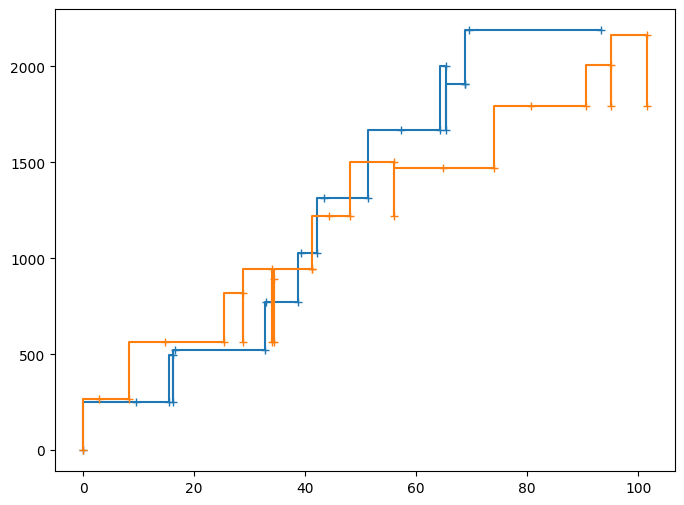

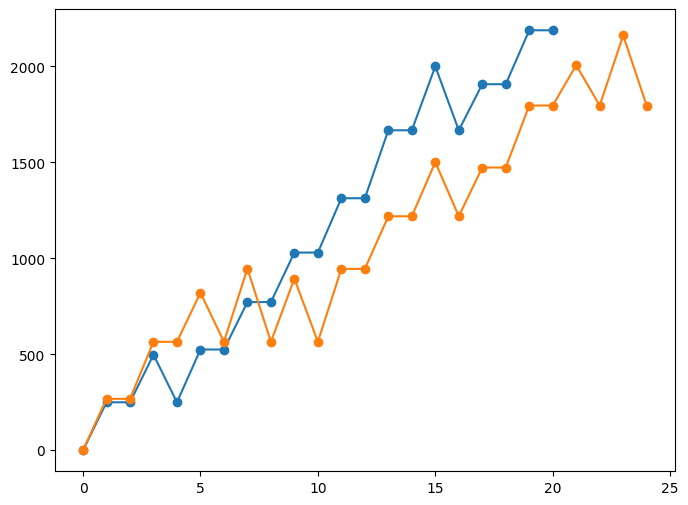

[[0, 250, 250, 498, 250, 525, 525, 772, 772, 1030, 1030, 1313, 1313, 1667, 1667, 2000, 1667, 1907, 1907, 2188, 2188], [0, 268, 268, 565, 565, 821, 565, 946, 565, 894, 565, 945, 945, 1219, 1219, 1501, 1219, 1473, 1473, 1796, 1796, 2006, 1796, 2161, 1796]]
[[0.0, 9.547052740320428, 15.393154725908442, 16.259802266437823, 16.259802266437823, 16.651642630168624, 32.718111658778426, 32.99108381610351, 38.707036866731336, 39.33370018198628, 42.10984250618984, 43.31919643429255, 51.356615866059244, 57.27641719748995, 64.2714662830563, 65.35495885275758, 65.35495885275758, 68.74894407655424, 68.76929732373166, 69.57339452178307, 93.30892590706453], [0.0, 2.907145333025813, 8.194257385297098, 14.825967438837214, 25.380209109223287, 28.809903167372767, 28.809903167372767, 33.96078317419712, 33.96078317419712, 34.39330022447007, 34.39330022447007, 41.27520016706762, 41.28119742784519, 44.31831983236884, 48.089382322463095, 56.007357448862045, 56.007357448862045, 64.89797088305131, 74.073207255152

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

positions = [
    [0, 250, 250, 498, 250, 525, 525, 772, 772, 1030, 1030,
    1313, 1313, 1667, 1667, 2000, 1667, 1907, 1907, 2188,
    2188],
    [0, 268, 268, 565, 565, 821, 565, 946, 565, 894, 565,
    945, 945, 1219, 1219, 1501, 1219, 1473, 1473, 1796,
    1796, 2006, 1796, 2161, 1796]
]

times = [
    [0.0, 9.547052740320428, 15.393154725908442, 16.259802266437823,
    16.259802266437823, 16.651642630168624, 32.718111658778426,
    32.99108381610351, 38.707036866731336, 39.33370018198628,
    42.10984250618984, 43.31919643429255, 51.356615866059244,
    57.27641719748995, 64.2714662830563, 65.35495885275758,
    65.35495885275758, 68.74894407655424, 68.76929732373166,
    69.57339452178307, 93.30892590706453],
    [0.0, 2.907145333025813, 8.194257385297098, 14.825967438837214,
    25.380209109223287, 28.809903167372767, 28.809903167372767,
    33.96078317419712, 33.96078317419712, 34.39330022447007,
    34.39330022447007, 41.27520016706762, 41.28119742784519,
    44.31831983236884, 48.089382322463095, 56.007357448862045,
    56.007357448862045, 64.89797088305131, 74.07320725515285,
    80.63486045346507, 90.53564626363878, 95.04002387678506,
    95.04002387678506, 101.49787833244204, 101.49787833244204]
]



plt.figure(figsize=(8,6))
plt.step(times[0], positions[0], marker="+")
plt.step(times[1], positions[1], marker="+")
plt.show()

plt.figure(figsize=(8,6))
plt.plot(np.arange(0, len(positions[0]),1), positions[0], marker="o")
plt.plot(np.arange(0, len(positions[1]),1), positions[1], marker="o")
plt.show()

print(positions)
print(times)

In [127]:
# Getting the datas : ok !

x = listoflist_into_matrix(positions)
t = np.diff(listoflist_into_matrix(times), axis=1)
print(x, "\n\n", t)

[[   0.  250.  250.  498.  250.  525.  525.  772.  772. 1030. 1030. 1313.
  1313. 1667. 1667. 2000. 1667. 1907. 1907. 2188. 2188.   nan   nan   nan
    nan]
 [   0.  268.  268.  565.  565.  821.  565.  946.  565.  894.  565.  945.
   945. 1219. 1219. 1501. 1219. 1473. 1473. 1796. 1796. 2006. 1796. 2161.
  1796.]] 

 [[9.54705274e+00 5.84610199e+00 8.66647541e-01 0.00000000e+00
  3.91840364e-01 1.60664690e+01 2.72972157e-01 5.71595305e+00
  6.26663315e-01 2.77614232e+00 1.20935393e+00 8.03741943e+00
  5.91980133e+00 6.99504909e+00 1.08349257e+00 0.00000000e+00
  3.39398522e+00 2.03532472e-02 8.04097198e-01 2.37355314e+01
             nan            nan            nan            nan]
 [2.90714533e+00 5.28711205e+00 6.63171005e+00 1.05542417e+01
  3.42969406e+00 0.00000000e+00 5.15088001e+00 0.00000000e+00
  4.32517050e-01 0.00000000e+00 6.88189994e+00 5.99726078e-03
  3.03712240e+00 3.77106249e+00 7.91797513e+00 0.00000000e+00
  8.89061343e+00 9.17523637e+00 6.56165320e+00 9.90078581e+00

In [ ]:
def getting_dwell_times(t_matrix: list, x_matrix: list, first_bin: float, last_bin: float, bin_width: float) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    Computes the dwell time distributions for forward and reverse events based on time and position matrices.

    Args:
        t_matrix (list of list): Time values. Each sublist corresponds to a trajectory.
        x_matrix (list of list): Position values. Each sublist corresponds to a trajectory.
        first_bin: Lower bound of histogram bins.
        last_bin: Upper bound of histogram bins.
        bin_width: Width of histogram bins.

    Returns:
        Tuple of bin centers and forward time distribution.
            - t_points (np.ndarray): points of the distributions.
            - forward_result (np.ndarray): forward dwell time distribution.
            - reverse_result (np.ndarray): reverse dwell time distribution.
    
    Notes
    -----
    - A "dwell" corresponds to a time interval between two steps.
    - Forward dwells are detected when two consecutive jumps go forward.
    - Reverse dwells are detected when a forward jump is followed by a reverse.
    - Nan values in the input are safely masked and ignored.
    - Zero-duration dwell times are excluded from the final distributions.

    Notations
    -----
    - e for event
    - d for dwell
    - e_forwards : True = Forward & False = Reverse & -- = nan
    """

    # Getting the datas in the proper format
    t = np.diff(listoflist_into_matrix(t_matrix), axis=1)
    x = listoflist_into_matrix(x_matrix)

    # Filtering on the x positions : did it progress along chromatin or not ?
    x_pair = x[:, 0::2]
    x_mask = np.ma.masked_invalid(x_pair)
    e_forwards = x_mask[:, :-1] < x_mask[:, 1:]

    # Filtering on the events to get the dwells : 
    d_forwards = (e_forwards[:, :-1] == True) & (e_forwards[:, 1:] == True)     # was there a forward jump then a forward jump ?
    d_reverses = (e_forwards[:, :-1] == True) & (e_forwards[:, 1:] == False)    # was there a forward jump then a reverse jump ?

    # Calculating time associated by grouping them per 2 because of our formalism : bind + rest
    t_event = np.add(t[:, ::2], t[:, 1::2])
    t_forwards = d_forwards * t_event[:, :-1]
    t_reverses = d_reverses * t_event[:, :-1]

    # Filtering the results to remove the 0.0 and --
    t_forwards_filtered = t_forwards[t_forwards != 0.0].compressed()
    t_reverses_filtered = t_reverses[t_reverses != 0.0].compressed()

    # Calculating the distributions of all extracted times
    t_points = np.arange(first_bin, last_bin, bin_width)
    forward_result = calculate_distribution(t_forwards_filtered, first_bin, last_bin, bin_width)
    reverse_result = calculate_distribution(t_reverses_filtered, first_bin, last_bin, bin_width)

    return t_points, forward_result, reverse_result

# Mapping the Taus and Vs

In [156]:
# Librairies
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
import fastparquet as fp
import pyarrow.parquet as pq
from dataclasses import dataclass
from typing import List


# Datas
@dataclass
class SimulationParams:
    """Container for physical simulation parameters."""
    rtot_bind: float
    rtot_rest: float


# Files
base_path = "/home/nicolas/Documents/Workspace/nucleo/outputs/ncl_map_0"

df_pl_tau = pl.DataFrame()

# Exploration récursive
for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith(".parquet"):
            full_path = os.path.join(root, file)
            try:
                df = pl.read_parquet(full_path)
                # print(df)

                if all(col in df.columns for col in ["lmbda", "rtot_bind", "rtot_rest", "tau_forwards", "tau_reverses", "v_mean", "v_th", "v_fit"]):
                    df_selected = df.select(["lmbda", "rtot_bind", "rtot_rest", "tau_forwards", "tau_reverses", "v_mean", "v_th", "v_fit"])
                    df_pl_tau = pl.concat([df_pl_tau, df_selected])
            except Exception as e:
                print(f"Erreur avec {full_path} : {e}")

print(df_pl_tau)

shape: (40_000, 8)
┌───────┬───────────┬───────────┬──────────────┬──────────────┬───────────┬───────────┬───────────┐
│ lmbda ┆ rtot_bind ┆ rtot_rest ┆ tau_forwards ┆ tau_reverses ┆ v_mean    ┆ v_th      ┆ v_fit     │
│ ---   ┆ ---       ┆ ---       ┆ ---          ┆ ---          ┆ ---       ┆ ---       ┆ ---       │
│ f64   ┆ f64       ┆ f64       ┆ f64          ┆ f64          ┆ f64       ┆ f64       ┆ f64       │
╞═══════╪═══════════╪═══════════╪══════════════╪══════════════╪═══════════╪═══════════╪═══════════╡
│ 0.1   ┆ 0.114372  ┆ 0.054973  ┆ 19.037477    ┆ 16.659491    ┆ 9.944866  ┆ 10.024377 ┆ 14.821984 │
│ 0.7   ┆ 0.069581  ┆ 0.05      ┆ 23.425092    ┆ 18.629837    ┆ 3.43697   ┆ 2.618432  ┆ 3.599029  │
│ 0.1   ┆ 0.904936  ┆ 0.083615  ┆ 10.968037    ┆ 10.786995    ┆ 22.579442 ┆ 20.66646  ┆ 35.89141  │
│ 0.3   ┆ 0.092993  ┆ 0.231417  ┆ 12.706526    ┆ 11.446062    ┆ 14.369538 ┆ 13.930582 ┆ 15.599647 │
│ 0.5   ┆ 0.074813  ┆ 0.079601  ┆ 16.349342    ┆ 18.056083    ┆ 6.571994  ┆ 5.784

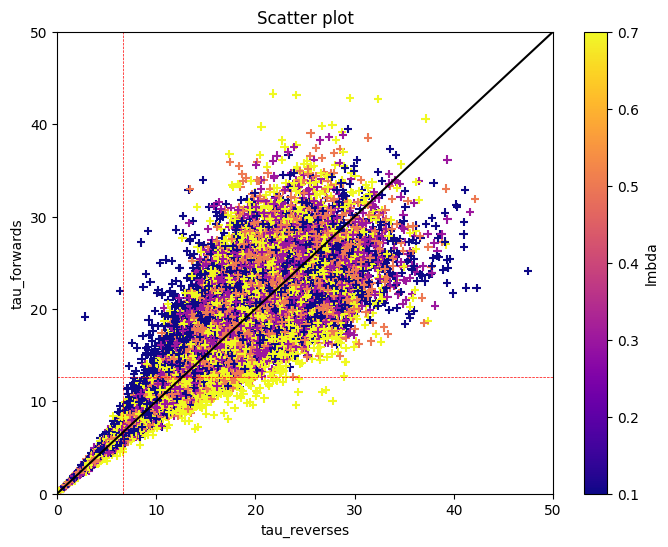

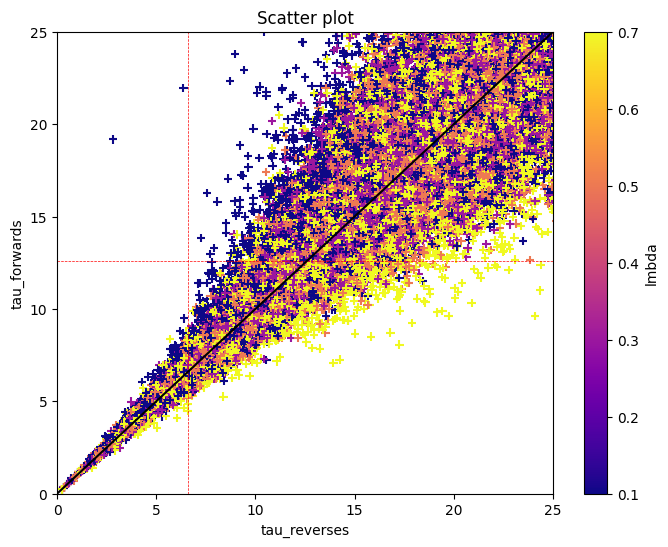

In [154]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sc = plt.scatter(
    df_pl_tau["tau_reverses"],
    df_pl_tau["tau_forwards"],
    c=df_pl_tau["lmbda"],
    cmap="plasma",
    marker="+"
)
plt.colorbar(sc, label="lmbda")
plt.axhline(y=12.6, c="r", lw=0.5, ls="--")
plt.axvline(x=6.6, c="r", lw=0.5, ls="--")
plt.ylabel("tau_forwards")
plt.xlabel("tau_reverses")
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.title("Scatter plot")
plt.plot(np.arange(0,200,1), np.arange(0,200,1), c="k")
plt.show()


# recopier ici pour zoomer
plt.figure(figsize=(8,6))
sc = plt.scatter(
    df_pl_tau["tau_reverses"],
    df_pl_tau["tau_forwards"],
    c=df_pl_tau["lmbda"],
    cmap="plasma",
    marker="+"
)
plt.colorbar(sc, label="lmbda")
plt.axhline(y=12.6, c="r", lw=0.5, ls="--")
plt.axvline(x=6.6, c="r", lw=0.5, ls="--")
plt.ylabel("tau_forwards")
plt.xlabel("tau_reverses")
plt.xlim([0, 25])
plt.ylim([0, 25])
plt.title("Scatter plot")
plt.plot(np.arange(0,200,1), np.arange(0,200,1), c="k")
plt.show()

Tau linéaire: [0.5        0.51515152 0.53030303 0.54545455 0.56060606 0.57575758
 0.59090909 0.60606061 0.62121212 0.63636364 0.65151515 0.66666667
 0.68181818 0.6969697  0.71212121 0.72727273 0.74242424 0.75757576
 0.77272727 0.78787879 0.8030303  0.81818182 0.83333333 0.84848485
 0.86363636 0.87878788 0.89393939 0.90909091 0.92424242 0.93939394
 0.95454545 0.96969697 0.98484848 1.         1.01515152 1.03030303
 1.04545455 1.06060606 1.07575758 1.09090909 1.10606061 1.12121212
 1.13636364 1.15151515 1.16666667 1.18181818 1.1969697  1.21212121
 1.22727273 1.24242424 1.25757576 1.27272727 1.28787879 1.3030303
 1.31818182 1.33333333 1.34848485 1.36363636 1.37878788 1.39393939
 1.40909091 1.42424242 1.43939394 1.45454545 1.46969697 1.48484848
 1.5        1.51515152 1.53030303 1.54545455 1.56060606 1.57575758
 1.59090909 1.60606061 1.62121212 1.63636364 1.65151515 1.66666667
 1.68181818 1.6969697  1.71212121 1.72727273 1.74242424 1.75757576
 1.77272727 1.78787879 1.8030303  1.81818182 1.83

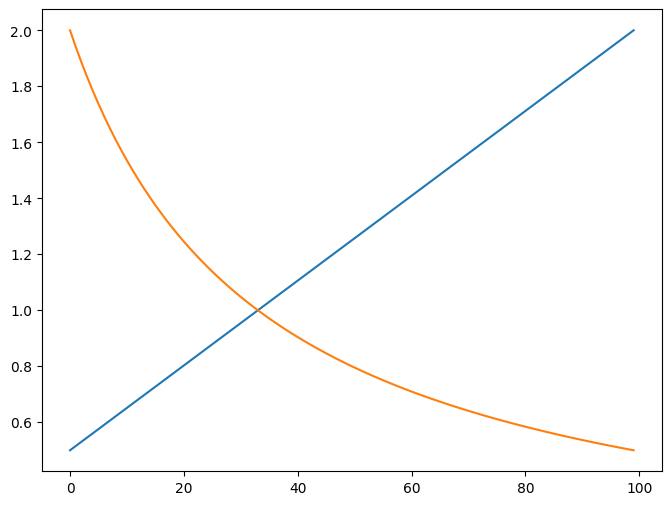

In [87]:
import numpy as np

tau_min = 0.5
tau_max = 2.0
n_points = 100

# Construis tau linéaire
tau_linear = np.linspace(tau_min, tau_max, n_points)

# En déduis r
r_for_linear_tau = 1 / tau_linear

print("Tau linéaire:", tau_linear)
print("r à utiliser:", r_for_linear_tau)

plt.figure(figsize=(8,6))
plt.plot(tau_linear)
plt.plot(r_for_linear_tau)
plt.show()

'/mnt/data/bille_rouge.gif'

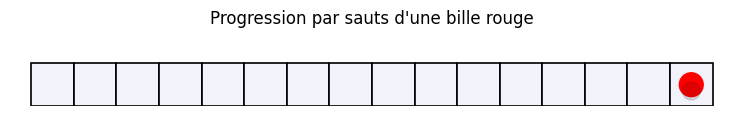

In [4]:
# Animation à 1 dimension du modèle

# Let's generate a simple Python animation (as a GIF) of a red ball jumping across aligned square cells.
# You can tweak parameters at the top (number of cells, path, speeds).

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, patches
from pathlib import Path
from IPython.display import HTML

# ------------------- Parameters ------------------- #
N_CELLS = 16                 # number of squares
CELL_SIZE = 1.0              # square size (visual only)
FPS = 30                     # frames per second for the GIF
SECS_PER_JUMP = 0.35         # duration of one jump (in seconds)
PAUSE_AT_CELL = 0.12         # pause duration once the ball lands (seconds)
BALL_RADIUS = 0.28           # relative to cell size
MARGIN_CELLS = 0.5           # empty margin on both sides (in cell units)

# Choose one of the two modes below:
MODE = "deterministic"       # "deterministic" | "random"
START_CELL = 0

# Deterministic path: go from left to right (one cell at a time)
END_CELL = N_CELLS - 1

# Random walk settings (used if MODE == "random")
N_STEPS_RANDOM = 28          # number of jumps to simulate
JUMP_OPTIONS = [1, 2]        # jump lengths allowed
P_JUMP = [0.7, 0.3]          # probabilities for the jumps above
BOUNDED = True               # keep the ball within [0, N_CELLS-1]

# Output
OUT_PATH = Path("/mnt/data/bille_rouge.gif")

# ------------------- Path generation ------------------- #
def deterministic_path(start=0, end=None):
    if end is None:
        end = N_CELLS - 1
    if start <= end:
        return list(range(start, end + 1))
    else:
        return list(range(start, end - 1, -1))

def random_path(start=0, n_steps=20, jumps=(1,2), probs=(0.7,0.3), bounded=True):
    pos = start
    path = [pos]
    for _ in range(n_steps):
        step = np.random.choice(jumps, p=probs)
        direction = np.random.choice([-1, 1])
        new_pos = pos + direction * step
        if bounded:
            new_pos = max(0, min(N_CELLS - 1, new_pos))
        pos = new_pos
        path.append(pos)
    return path

if MODE == "deterministic":
    cells_sequence = deterministic_path(START_CELL, END_CELL)
else:
    np.random.seed(7)
    cells_sequence = random_path(START_CELL, N_STEPS_RANDOM, JUMP_OPTIONS, P_JUMP, BOUNDED)

# Convert a sequence of visited cells into segments of (from_cell -> to_cell)
segments = list(zip(cells_sequence[:-1], cells_sequence[1:]))
if not segments:
    segments = [(START_CELL, START_CELL)]

# ------------------- Timing / frames ------------------- #
frames_per_jump = max(2, int(SECS_PER_JUMP * FPS))
pause_frames = int(PAUSE_AT_CELL * FPS)

# Build keyframes for the ball center across all segments
xs, ys = [], []
for a, b in segments:
    # move frames
    for t in np.linspace(0, 1, frames_per_jump, endpoint=False):
        # smooth jump trajectory: horizontal interpolation + small "plunge" arc in y
        x = (1 - t) * (a + 0.5) + t * (b + 0.5)
        # create a jump arc using a simple parabola peaking mid-air
        # arc height scales with jump length; small dip on landing
        length = abs(b - a)
        arc_amp = 0.15 + 0.06 * length  # tweak for visual niceness
        y = 0.5 + arc_amp * (4 * t * (1 - t))  # 0.5..0.5+arc
        xs.append(x)
        ys.append(y)
    # landing pause
    for _ in range(pause_frames):
        xs.append(b + 0.5)
        ys.append(0.5)

# ------------------- Figure setup ------------------- #
width_cells = N_CELLS + 2 * MARGIN_CELLS
fig_h = 2.8
fig_w = max(6.0, width_cells * 0.55)

fig, ax = plt.subplots(figsize=(fig_w, fig_h))
ax.set_aspect('equal')
ax.set_xlim(-MARGIN_CELLS, N_CELLS + MARGIN_CELLS)
ax.set_ylim(0, 1.6)

# Draw cells (as light squares)
for i in range(N_CELLS):
    rect = patches.Rectangle((i, 0), CELL_SIZE, CELL_SIZE,
                             linewidth=1.2, edgecolor='black',
                             facecolor=(0.95, 0.95, 0.98))
    ax.add_patch(rect)

# Labels / style
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
ax.set_title("Progression par sauts d'une bille rouge", pad=10)

# Ball artist
ball = plt.Circle((cells_sequence[0] + 0.5, 0.5), BALL_RADIUS, color='red')
ax.add_patch(ball)

# Optional: add a subtle shadow under the ball
shadow = plt.Circle((cells_sequence[0] + 0.5, 0.35), BALL_RADIUS * 0.75, color='black', alpha=0.12)
ax.add_patch(shadow)

# ------------------- Animation functions ------------------- #
def init():
    ball.center = (cells_sequence[0] + 0.5, 0.5)
    shadow.center = (cells_sequence[0] + 0.5, 0.35)
    return (ball, shadow)

def animate(frame_idx):
    x, y = xs[frame_idx], ys[frame_idx]
    ball.center = (x, y)

    # shadow follows x; slightly scales with height (farther = smaller/dimmer)
    scale = 1 - min(0.8, (y - 0.5) * 0.9)
    shadow.center = (x, 0.35)
    shadow.set_radius(BALL_RADIUS * 0.75 * scale)
    shadow.set_alpha(0.12 * scale)
    return (ball, shadow)

ani = animation.FuncAnimation(
    fig, animate, init_func=init,
    frames=len(xs), interval=1000/FPS, blit=True
)

# Save GIF
# Note: Pillow writer is typically available; if not, this will raise an error.
# OUT_PATH.parent.mkdir(parents=True, exist_ok=True)
HTML(ani.to_jshtml())  
OUT_PATH.as_posix()


In [90]:
# PSMN

# marcand.py : 70_000
# en 8 heures : 4_000
# temps estimé :
t_psmn = 70_000 * 8 / 4_000 / 24
print(t_psmn)

# Compter donc 6 jours : 22 juillet 00:00 par là

5.833333333333333


# .